In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_predict

In [3]:
df = sns.load_dataset('iris')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='Density'>

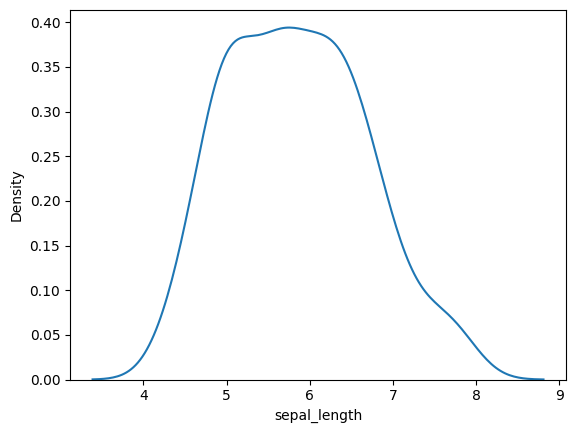

In [4]:
sns.kdeplot(df['sepal_length'])

In [5]:
temp = sorted(df['sepal_length'].tolist())
temp

[4.3,
 4.4,
 4.4,
 4.4,
 4.5,
 4.6,
 4.6,
 4.6,
 4.6,
 4.7,
 4.7,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.9,
 4.9,
 4.9,
 4.9,
 4.9,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.2,
 5.2,
 5.2,
 5.2,
 5.3,
 5.4,
 5.4,
 5.4,
 5.4,
 5.4,
 5.4,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.6,
 5.6,
 5.6,
 5.6,
 5.6,
 5.6,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.9,
 5.9,
 5.9,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.1,
 6.1,
 6.1,
 6.1,
 6.1,
 6.1,
 6.2,
 6.2,
 6.2,
 6.2,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.6,
 6.6,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.8,
 6.8,
 6.8,
 6.9,
 6.9,
 6.9,
 6.9,
 7.0,
 7.1,
 7.2,
 7.2,
 7.2,
 7.3,
 7.4,
 7.6,
 7.7,
 7.7,
 7.7,
 7.7,
 7.9]

In [6]:
y_quant = []
for index in range(1, 101):
    y_quant.append(np.percentile(temp, index))

y_quant

[4.4,
 4.4,
 4.547,
 4.6,
 4.6,
 4.694,
 4.743,
 4.8,
 4.8,
 4.8,
 4.9,
 4.9,
 4.9,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.029,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.123,
 5.2,
 5.2,
 5.27,
 5.4,
 5.4,
 5.4,
 5.4,
 5.5,
 5.5,
 5.5,
 5.5,
 5.511,
 5.6,
 5.6,
 5.6,
 5.606999999999999,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.9,
 5.9,
 6.0,
 6.0,
 6.0,
 6.0,
 6.1,
 6.1,
 6.1,
 6.1,
 6.2,
 6.2,
 6.234,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.328,
 6.4,
 6.4,
 6.4,
 6.4,
 6.473000000000001,
 6.5,
 6.5,
 6.5200000000000005,
 6.6,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.763,
 6.8,
 6.8610000000000015,
 6.9,
 6.9,
 7.008000000000001,
 7.156999999999999,
 7.2,
 7.254999999999998,
 7.407999999999999,
 7.6530000000000005,
 7.7,
 7.7,
 7.9]

In [7]:
sample = np.random.normal(loc=0, scale=1, size=1000)

sample

array([ 1.54617034e+00, -3.23198085e-01, -2.07137992e-01,  7.15728765e-01,
       -5.80993328e-01, -7.11696343e-02, -3.42996028e-01, -1.63433321e+00,
       -5.33970884e-01, -7.20556865e-01,  1.24065882e+00, -6.05216191e-01,
       -8.38712316e-01, -1.22571019e-01, -4.95233487e-01,  2.26708646e+00,
       -1.13186350e+00,  4.11099453e-01,  4.68043810e-02, -1.33560098e+00,
        5.42548777e-01, -2.81322043e-01, -1.70627333e+00, -5.64482613e-01,
       -6.33312575e-02, -1.11499404e+00, -1.11007625e+00,  5.05164032e-01,
        3.76079358e-01, -1.87980321e+00,  4.61860970e-01, -6.44596216e-01,
        9.88964139e-01,  1.13216361e+00, -5.77632658e-01,  3.71747244e-01,
       -3.95285637e-02, -1.19624258e+00, -2.54390869e-01, -8.84838602e-01,
       -6.65520562e-01, -1.78832058e+00, -1.47779616e+00,  1.02393234e+00,
        1.40356269e+00,  5.29524241e-01,  4.80870246e-01,  1.63494178e-01,
       -2.71787582e-02, -1.16814602e+00, -3.77781648e-01, -1.36088897e-01,
       -2.86663967e-01,  

In [8]:
x_quant = []

for index in range(1, 101):
    x_quant.append(np.percentile(sample, index))

x_quant

[-2.1857483077080717,
 -1.9352034546160282,
 -1.7552408374713648,
 -1.6045081193175628,
 -1.513311986666704,
 -1.4229806479508722,
 -1.3494804730021726,
 -1.312919294391771,
 -1.2663543425716595,
 -1.227732644529393,
 -1.1779205965528368,
 -1.1410028576823956,
 -1.1152516129695136,
 -1.0822184313524936,
 -1.0247578773013661,
 -0.9702427141775516,
 -0.9267826912066586,
 -0.908908710597142,
 -0.8901271686352703,
 -0.8553699654696835,
 -0.8267895736109979,
 -0.791737560932672,
 -0.7512485669102583,
 -0.7202630862344191,
 -0.695040676590766,
 -0.6581373566291333,
 -0.6448210314767242,
 -0.6067377931438216,
 -0.5894089454495088,
 -0.5706518452110718,
 -0.5383364864822237,
 -0.4990092402005856,
 -0.4689462613216264,
 -0.448610658648273,
 -0.4217226048583139,
 -0.387805367617357,
 -0.3608031167730287,
 -0.33887707644146303,
 -0.3238171722974951,
 -0.30090760310943054,
 -0.2846507248004796,
 -0.2690675974495211,
 -0.2524560043208218,
 -0.23233621055479034,
 -0.17630979470037125,
 -0.1418990512

<Axes: >

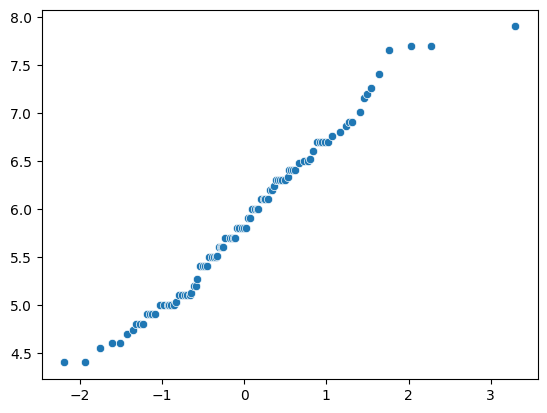

In [9]:
sns.scatterplot(x=x_quant, y=y_quant)

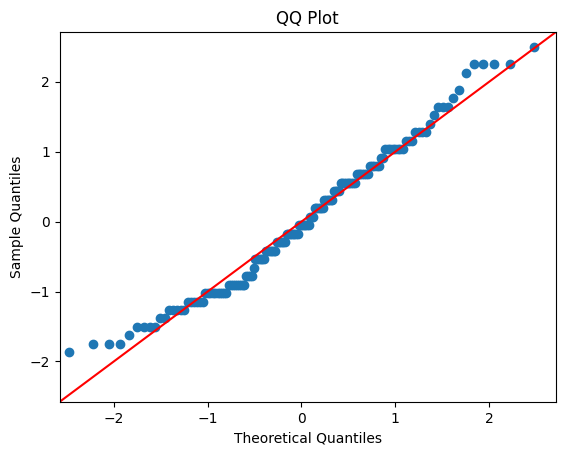

In [13]:
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [14]:
# uniform distribution

x = np.random.uniform(low=0, high=1, size=1000)

x

array([5.05334943e-01, 2.22433837e-01, 4.89769822e-01, 5.70812236e-01,
       1.11332935e-01, 4.92103002e-01, 7.65936159e-01, 1.01888396e-01,
       1.57408970e-01, 9.33316227e-01, 2.75119073e-01, 4.06164935e-01,
       1.66315017e-01, 6.61842926e-01, 6.80805481e-01, 9.59754970e-01,
       7.55605356e-01, 1.11771846e-01, 8.23946303e-02, 2.19354737e-01,
       6.58126508e-01, 6.79029122e-01, 1.56138076e-01, 4.30544280e-02,
       5.06426922e-01, 2.60526124e-02, 2.84315410e-01, 8.21097772e-01,
       3.98615099e-01, 7.89186637e-01, 6.87833350e-01, 2.60637657e-01,
       9.75907471e-01, 4.68329438e-01, 5.37267313e-01, 2.06759289e-01,
       9.57719939e-01, 8.61522106e-01, 3.49692130e-02, 9.92179314e-01,
       2.30506014e-01, 5.61787085e-01, 1.76742367e-02, 1.63794956e-01,
       7.75200399e-01, 1.61311304e-01, 1.59900052e-01, 8.05436190e-01,
       3.54943016e-01, 7.38562799e-01, 7.17548187e-01, 5.57278536e-01,
       1.84204495e-01, 1.95676498e-01, 1.72768389e-01, 4.38336492e-01,
      

(array([101., 117.,  90.,  98.,  96., 104.,  85.,  91., 109., 109.]),
 array([2.78835853e-04, 1.00117360e-01, 1.99955884e-01, 2.99794407e-01,
        3.99632931e-01, 4.99471455e-01, 5.99309979e-01, 6.99148503e-01,
        7.98987027e-01, 8.98825551e-01, 9.98664074e-01]),
 <BarContainer object of 10 artists>)

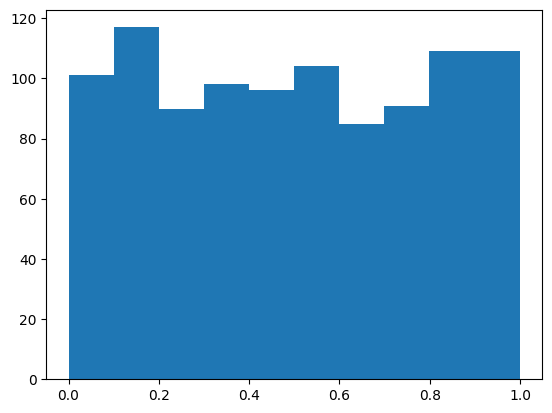

In [15]:
plt.hist(x=x)

In [16]:
params = stats.uniform.fit(x)
dist = stats.uniform(loc=params[0], scale=params[1])

print(params)
print("distribution: ", dist)

(0.00027883585307308945, 0.9983852385745293)
distribution:  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x719385cd1d00>


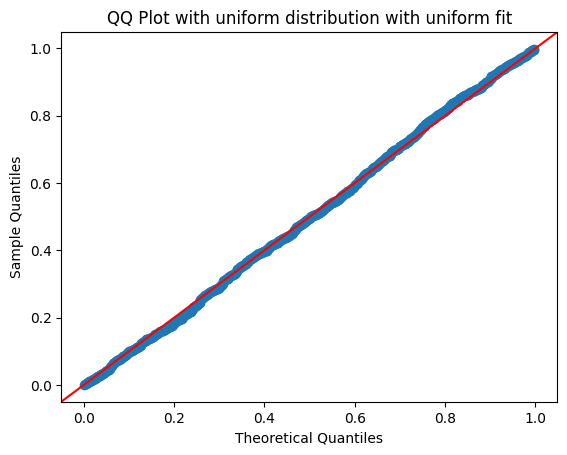

In [18]:
# QQ ploy using uniform distribution data

fig = sm.qqplot(x, dist=dist, line='45')

plt.title('QQ Plot with uniform distribution with uniform fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

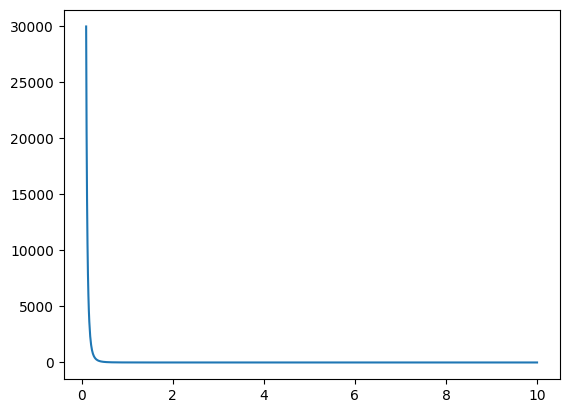

In [20]:
# Pareto Distribution
alpha = 3
xm = 1

x = np.linspace(0.1, 10, 1000)

y = alpha * (xm**alpha) / (x**(alpha + 1))

plt.plot(x, y)

Text(0.5, 1.0, 'Pareto Distribution')

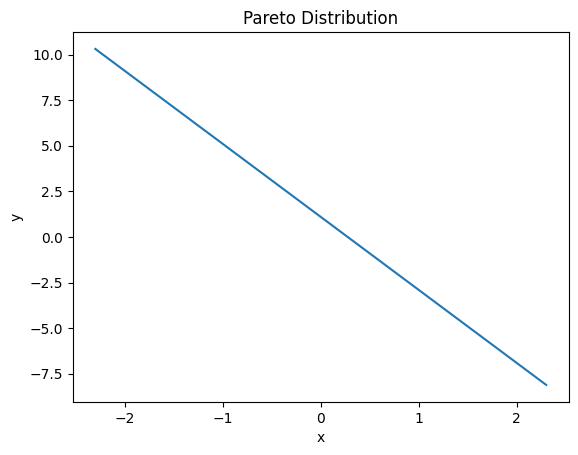

In [22]:
plt.plot(np.log(x), np.log(y))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Pareto Distribution')

In [23]:
alpha = 2
xm = 1

x = stats.pareto.rvs(b=alpha, scale=xm, size=1000)

x

array([ 1.11691794,  1.21213879,  1.18438603,  1.02224749,  1.76573925,
        1.05793439,  1.17428441,  1.59084943,  1.55621565,  2.34026773,
        1.97067638,  1.08754329,  2.39114212,  1.95542422,  1.51566414,
        1.46195244,  1.06133241,  1.34845478,  4.2667768 ,  1.00407261,
        2.07659207,  1.35267392,  1.99051103,  1.88924548,  1.1361216 ,
        1.19104422,  2.10800468,  1.24687935,  1.40210175,  1.50955047,
        2.31483234,  1.0015359 ,  2.3017834 ,  1.01171009,  1.0497559 ,
        5.10900929,  1.61937501,  1.64712533,  1.60294162,  2.29531953,
        1.49276652,  2.29810545,  1.10763711,  1.45933386,  1.87657465,
        3.01781268,  2.99426227,  3.79832056,  1.09162033,  1.01357511,
        1.17439143,  1.06749092,  3.2741865 ,  1.05418029,  1.02066444,
        1.01345552,  1.02511353,  2.52643193,  6.95530433,  1.01306976,
        1.03534222,  1.12850576,  1.54186756,  1.53604455,  1.68935573,
        1.93362018,  1.18151039,  2.09975005,  1.29025772,  1.61

(array([927.,  48.,  18.,   2.,   1.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1.00048243,  3.74496431,  6.48944619,  9.23392808, 11.97840996,
        14.72289184, 17.46737372, 20.2118556 , 22.95633748, 25.70081937,
        28.44530125]),
 <BarContainer object of 10 artists>)

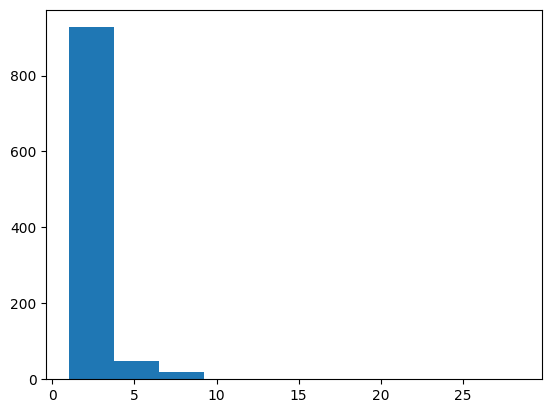

In [24]:
plt.hist(x)

In [27]:
params = stats.pareto.fit(x, floc=0)
dist = stats.pareto(b=params[0], scale=params[2])

dist

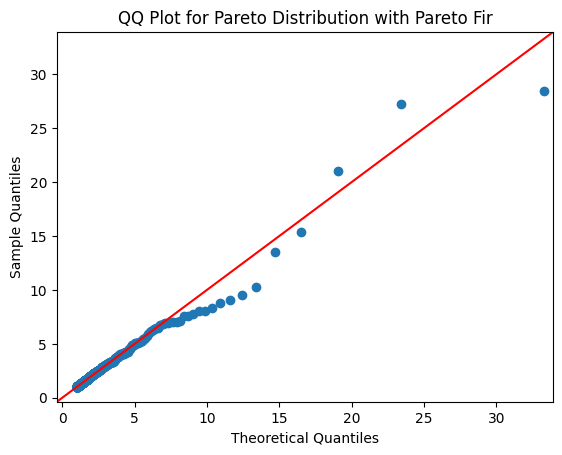

In [28]:
fig = sm.qqplot(x, dist=dist, line='45')

plt.title('QQ Plot for Pareto Distribution with Pareto Fir')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()